In [2]:
from robustbench.data import load_cifar10c
from robustbench.data import load_cifar10
from robustbench.utils import clean_accuracy
from robustbench.utils import load_model
import matplotlib.pyplot as plt

In [5]:
model = load_model(model_name='Standard',dataset='cifar10',threat_model='corruptions').eval()
x_clean,y_clean = load_cifar10(10000)

CORRUPTIONS = ["gaussian_noise","shot_noise","impulse_noise", 
               "defocus_blur","glass_blur","motion_blur","zoom_blur",
               "snow","frost", "fog",
               "brightness", "contrast","elastic_transform","pixelate","jpeg_compression"]
imgs_per_corr = 10000
x_corr,y_corr = load_cifar10c(imgs_per_corr*len(CORRUPTIONS),5,corruptions=CORRUPTIONS,data_dir='/home/gc28692/Projects/data/')

Files already downloaded and verified


In [9]:
model

WideResNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (block1): NetworkBlock(
    (layer): Sequential(
      (0): BasicBlock(
        (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(16, 160, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(160, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(160, 160, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (convShortcut): Conv2d(16, 160, kernel_size=(1, 1), stride=(1, 1), bias=False)
      )
      (1): BasicBlock(
        (bn1): BatchNorm2d(160, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(160, 160, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNor

In [8]:
for name, module in model.named_modules():
    print(name)


conv1
block1
block1.layer
block1.layer.0
block1.layer.0.bn1
block1.layer.0.relu1
block1.layer.0.conv1
block1.layer.0.bn2
block1.layer.0.relu2
block1.layer.0.conv2
block1.layer.0.convShortcut
block1.layer.1
block1.layer.1.bn1
block1.layer.1.relu1
block1.layer.1.conv1
block1.layer.1.bn2
block1.layer.1.relu2
block1.layer.1.conv2
block1.layer.2
block1.layer.2.bn1
block1.layer.2.relu1
block1.layer.2.conv1
block1.layer.2.bn2
block1.layer.2.relu2
block1.layer.2.conv2
block1.layer.3
block1.layer.3.bn1
block1.layer.3.relu1
block1.layer.3.conv1
block1.layer.3.bn2
block1.layer.3.relu2
block1.layer.3.conv2
block2
block2.layer
block2.layer.0
block2.layer.0.bn1
block2.layer.0.relu1
block2.layer.0.conv1
block2.layer.0.bn2
block2.layer.0.relu2
block2.layer.0.conv2
block2.layer.0.convShortcut
block2.layer.1
block2.layer.1.bn1
block2.layer.1.relu1
block2.layer.1.conv1
block2.layer.1.bn2
block2.layer.1.relu2
block2.layer.1.conv2
block2.layer.2
block2.layer.2.bn1
block2.layer.2.relu1
block2.layer.2.conv1

In [53]:
# for name, param in model.named_parameters():
#     print(param)
for name, module in model.named_modules():
    if name == 'conv1':
        print(module.state_dict())
        for param in module.parameters():
            param.requires_grad = True

OrderedDict([('weight', tensor([[[[ 0.1405, -0.1602, -0.1460],
          [ 0.1509,  0.1382,  0.1378],
          [ 0.1136, -0.1070,  0.0696]],

         [[ 0.1750, -0.1580,  0.1667],
          [-0.1539,  0.0770, -0.1131],
          [-0.0819, -0.0689, -0.1893]],

         [[-0.1469, -0.0819, -0.1770],
          [-0.1487,  0.0153, -0.1152],
          [-0.0730,  0.0023,  0.1439]]],


        [[[-0.1259,  0.0009,  0.0592],
          [ 0.0220, -0.0417,  0.0076],
          [ 0.1366, -0.0878,  0.0614]],

         [[-0.1174, -0.1266, -0.1226],
          [ 0.1181, -0.1300,  0.0085],
          [ 0.1745,  0.1400,  0.0044]],

         [[ 0.1069, -0.0115,  0.0127],
          [ 0.1534,  0.1686,  0.0903],
          [-0.0951, -0.1721,  0.1565]]],


        [[[-0.0760, -0.0716, -0.1778],
          [-0.1201, -0.0499,  0.0685],
          [ 0.0521, -0.1263,  0.1001]],

         [[ 0.0985, -0.0890,  0.1611],
          [-0.0043,  0.1683,  0.0158],
          [-0.0956,  0.1627, -0.0330]],

         [[-0.1460, 

In [22]:
# clean
eval_results = {corr: 0 for corr in ['clean'] + CORRUPTIONS}
eval_results['clean'] = clean_accuracy(model.to('cuda'),x_clean,y_clean,256,'cuda')

# corrupted
for corr_i,corr in enumerate(CORRUPTIONS):
    s = corr_i*imgs_per_corr
    e = s + imgs_per_corr
    eval_results[corr] = clean_accuracy(model.to('cuda'),x_corr[s:e],y_corr[s:e],256,'cuda')
print(eval_results)

{'clean': 0.9477, 'gaussian_noise': 0.2767, 'shot_noise': 0.3429, 'impulse_noise': 0.2708, 'defocus_blur': 0.5305, 'glass_blur': 0.4567, 'motion_blur': 0.6524, 'zoom_blur': 0.5798, 'snow': 0.7491, 'frost': 0.5869, 'fog': 0.74, 'brightness': 0.9069, 'contrast': 0.533, 'elastic_transform': 0.7341, 'pixelate': 0.4155, 'jpeg_compression': 0.697}


([<matplotlib.axis.XTick at 0x7f9faa486b20>,
 [Text(0, 0, 'clean'),
  Text(1, 0, 'gaussian_noise'),
  Text(2, 0, 'shot_noise'),
  Text(3, 0, 'impulse_noise'),
  Text(4, 0, 'defocus_blur'),
  Text(5, 0, 'glass_blur'),
  Text(6, 0, 'motion_blur'),
  Text(7, 0, 'zoom_blur'),
  Text(8, 0, 'snow'),
  Text(9, 0, 'frost'),
  Text(10, 0, 'fog'),
  Text(11, 0, 'brightness'),
  Text(12, 0, 'contrast'),
  Text(13, 0, 'elastic_transform'),
  Text(14, 0, 'pixelate'),
  Text(15, 0, 'jpeg_compression')])

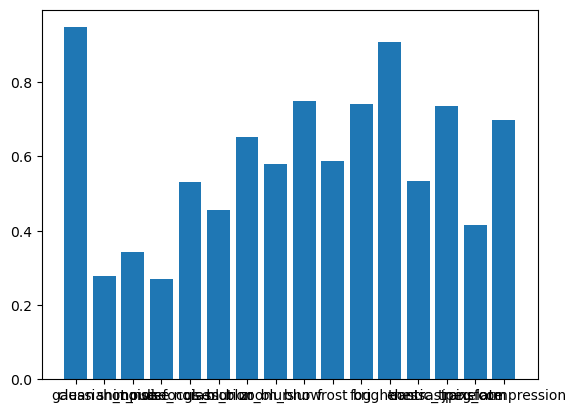

In [24]:
plt.bar(range(len(eval_results)), list(eval_results.values()), align='center')
plt.xticks(range(len(eval_results)), list(eval_results.keys()))

In [42]:
for n,m in model.named_modules():
    if n == 'conv1':
        print(m.weight.shape)
    if n == 'block1.layer.0.conv1':
        print(m.weight.shape)

torch.Size([16, 3, 3, 3])
torch.Size([160, 16, 3, 3])
